testing save

 ## Importing Libraries

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [656]:
df = pd.read_csv('Terry_Stops.csv')

df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


In [657]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,4.483800e+04,4.483800e+04,4.483800e+04,44838.000000
mean,2.048175e+09,2.017435e+13,2.744795e+09,1982.668585
std,3.929608e+09,1.628590e+10,5.137080e+09,9.293030
min,-1.000000e+00,2.009000e+13,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,1.733272e+05,1978.000000
50%,-1.000000e+00,2.018000e+13,3.866160e+05,1985.000000
75%,-1.000000e+00,2.019000e+13,5.501900e+05,1989.000000
max,1.755179e+10,2.020000e+13,1.755178e+10,1997.000000


In [658]:
# checking for null, data type and name of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44838 non-null  object
 1   Subject ID                44838 non-null  int64 
 2   GO / SC Num               44838 non-null  int64 
 3   Terry Stop ID             44838 non-null  int64 
 4   Stop Resolution           44838 non-null  object
 5   Weapon Type               44838 non-null  object
 6   Officer ID                44838 non-null  object
 7   Officer YOB               44838 non-null  int64 
 8   Officer Gender            44838 non-null  object
 9   Officer Race              44838 non-null  object
 10  Subject Perceived Race    44838 non-null  object
 11  Subject Perceived Gender  44838 non-null  object
 12  Reported Date             44838 non-null  object
 13  Reported Time             44838 non-null  object
 14  Initial Call Type     

In [659]:
# checking for null values
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               580
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [660]:
# drop the rows with null values and reset the index
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [661]:
# check for duplicates
boolean = df.duplicated().any()
print(boolean, end='\n\n') # True

False



In [662]:
df = df.replace('-', 'Unknown')

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44258 entries, 0 to 44257
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         44258 non-null  object
 1   Subject ID                44258 non-null  int64 
 2   GO / SC Num               44258 non-null  int64 
 3   Terry Stop ID             44258 non-null  int64 
 4   Stop Resolution           44258 non-null  object
 5   Weapon Type               44258 non-null  object
 6   Officer ID                44258 non-null  object
 7   Officer YOB               44258 non-null  int64 
 8   Officer Gender            44258 non-null  object
 9   Officer Race              44258 non-null  object
 10  Subject Perceived Race    44258 non-null  object
 11  Subject Perceived Gender  44258 non-null  object
 12  Reported Date             44258 non-null  object
 13  Reported Time             44258 non-null  object
 14  Initial Call Type     

In [664]:
#look at the unique data of each column
for col in df.columns:
    print(col, '\n', df[col].unique(), '\n\n')

Subject Age Group 
 ['Unknown' '46 - 55' '56 and Above' '1 - 17' '18 - 25' '36 - 45' '26 - 35'] 


Subject ID 
 [         -1 16366865981  7726713382 ... 13855696527 13930427243
 14268071835] 


GO / SC Num 
 [20140000120677 20150000002351 20150000002363 ... 20200000211163
 20200000218545 20200000223475] 


Terry Stop ID 
 [      92317       45252       45182 ... 13855817033 13928574375
 14273492771] 


Stop Resolution 
 ['Arrest' 'Field Contact' 'Citation / Infraction' 'Offense Report'
 'Referred for Prosecution'] 


Weapon Type 
 ['None' 'Firearm Other' 'Lethal Cutting Instrument' 'Handgun' 'Unknown'
 'Club, Blackjack, Brass Knuckles' 'Knife/Cutting/Stabbing Instrument'
 'Other Firearm' 'Rifle' 'Fire/Incendiary Device'
 'Blunt Object/Striking Implement' 'Firearm (unk type)'
 'Mace/Pepper Spray' 'None/Not Applicable' 'Club' 'Firearm'
 'Taser/Stun Gun' 'Shotgun' 'Brass Knuckles' 'Automatic Handgun'
 'Blackjack'] 


Officer ID 
 ['7500  ' '7591  ' '7560  ' ... '8749  ' '6983  ' '5917  ']

In [665]:
df.describe(include = 'all')

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
count,44258,4.425800e+04,4.425800e+04,4.425800e+04,44258,44258,44258,44258.000000,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258,44258
unique,7,NaN,NaN,NaN,5,21,1164,NaN,2,9,9,5,1998,10894,165,204,7,168,2,3,9,36,107
top,26 - 35,NaN,NaN,NaN,Field Contact,None,7456,NaN,M,White,White,Male,2015-10-01T00:00:00,17:00:00,Unknown,Unknown,911,TRAINING - FIELD TRAINING SQUAD,N,N,West,Unknown,Unknown
freq,14743,NaN,NaN,NaN,17704,32085,393,NaN,39226,33689,21631,34593,101,51,12791,12791,19668,4756,41633,33966,10484,9760,9707
mean,NaN,2.061739e+09,2.017454e+13,2.763394e+09,NaN,NaN,NaN,1982.779882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.937583e+09,1.621511e+10,5.149534e+09,NaN,NaN,NaN,9.004519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.000000e+00,2.009000e+13,4.257800e+04,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,-1.000000e+00,2.016000e+13,1.772252e+05,NaN,NaN,NaN,1978.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1.000000e+00,2.018000e+13,3.880850e+05,NaN,NaN,NaN,1985.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1.000000e+00,2.019000e+13,5.512335e+05,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [666]:
#look at the value counts of each column (not normalized)
def col_values(df):
    """
    For use in Preprocessing and cleaning to find placeholder values
    Input: Data frame
    Output: Counts of unique values for each column
    """
    for col in df.columns:
        print(col)
        print('\n')
        print(df[col].value_counts())
        print('-------------------------------------------------------')
        print('\n')
        
col_values(df)

Subject Age Group


26 - 35         14743
36 - 45          9335
18 - 25          8924
46 - 55          5698
56 and Above     2251
1 - 17           1907
Unknown          1400
Name: Subject Age Group, dtype: int64
-------------------------------------------------------


Subject ID


-1              34181
 7726859935        19
 7753260438        13
 7727117712        12
 7734218049         8
                ...  
 7730602336         1
 15879606630        1
 7758922092         1
 7727677812         1
 16219707395        1
Name: Subject ID, Length: 7899, dtype: int64
-------------------------------------------------------


GO / SC Num


20160000378750    16
20150000190790    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20190000045451     1
20170000158799     1
20150000003136     1
20180000479302     1
20180000071981     1
Name: GO / SC Num, Length: 34574, dtype: int64
-------------------------------------------------------


Terry Stop ID


130800

Initial Thoughts on How to Handle the Columns:

**Subject Age Group** none
**Subject ID**  drop since subjects are not required to present ID
**GO / SC Num**  drop because the numbers may have a one to many relationship
**Terry Stop ID**  drop as ID is not important when looking at relationships
**Stop Resolution** Categorize to Arrest(1) and Not Arrested(0)
**Weapon Type** Categorize to Weapon found at time of Frisk Yes(1) No(0)
**Officer ID** Create Bins of 0-99, 100-199, 200-299, 300-399
    Q: Were Officers with higher amount of cases/stops having high arrest percentage?
**Officer YOB**  Bin the birthdates
**Officer Gender**  Categorize to Female(1), Male(0)
**Officer Race**  Categorize to White(1), Not-White(0)
**Subject Perceived Race**  Drop as this is based on the officers' account and can be biased
**Subject Perceived Gender**  Categorize to only Female(1) and Male(0)
**Reported Date**  Categorize to Years (maybe bins)
**Reported Time**  Categorize to Day and Night shifts
**Initial Call Type**  Drop since majority is categorized as unknown
**Final Call Type** Drop since majority is categorized as unknown
**Call Type**  Categorize as 911(1) and not911(0)
**Officer Squad**  Drop too much room for error in trying to evaluate this data set
**Arrest Flag** Good
**Frisk Flag**  Drop rows with 'unknown' as this is a small amount
**Precinct** fix OOJ and FK ERROR. May help with location of dispatched officer
**Sector**. May help with location of dispatched officer
Beat**  Precinct,Sector and Beat are together with identifying location of dispatch

In [667]:
# show names of columns
for col in df.columns:
    print(col)

Subject Age Group
Subject ID
GO / SC Num
Terry Stop ID
Stop Resolution
Weapon Type
Officer ID
Officer YOB
Officer Gender
Officer Race
Subject Perceived Race
Subject Perceived Gender
Reported Date
Reported Time
Initial Call Type
Final Call Type
Call Type
Officer Squad
Arrest Flag
Frisk Flag
Precinct
Sector
Beat


Take out the columns I don't need and make the columns python friendly 

In [668]:
df.columns = ['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat']
df.columns


Index(['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat'],
      dtype='object')

## **Scrubbing**

In [669]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,Unknown,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,Unknown,-1,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown
2,Unknown,-1,20150000002363,45182,Field Contact,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown
3,Unknown,-1,20150000002392,45365,Field Contact,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2
4,Unknown,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown


In [670]:
# df = df.drop(['go_sc_num','terry_stop_id','officer_id','sector','beat'], axis=1)
# df.columns

### Subject ID

Will need to feature engineer this to make a column for repeat offenders and drop subject_id

In [671]:
import numpy as np

df['repeat_offenders'] = np.nan

for i in range(len(df['subject_id'])):
    if df['subject_id'].iloc[i] > 1:
        df['repeat_offenders'].iloc[i] = 'Y'
    else:
        df['repeat_offenders'].iloc[i] = 'N'

df['repeat_offenders'].value_counts()

N    34181
Y    10077
Name: repeat_offenders, dtype: int64

In [672]:
df.subject_id.value_counts()

-1              34181
 7726859935        19
 7753260438        13
 7727117712        12
 7734218049         8
                ...  
 7730602336         1
 15879606630        1
 7758922092         1
 7727677812         1
 16219707395        1
Name: subject_id, Length: 7899, dtype: int64

In [673]:
df['subject_id'] = df.subject_id.replace(-1, 'unassigned')
df.subject_id.value_counts()

unassigned     34181
7726859935        19
7753260438        13
7727117712        12
7726342469         8
               ...  
7727409564         1
10372082077        1
7725984159         1
7726246304         1
7729725441         1
Name: subject_id, Length: 7899, dtype: int64

In [674]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
0,Unknown,unassigned,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N
1,Unknown,unassigned,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N
2,Unknown,unassigned,20150000002363,45182,Field Contact,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N
3,Unknown,unassigned,20150000002392,45365,Field Contact,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N
4,Unknown,unassigned,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N


## General Offense/Street Check Number (go_sc_num)

In [675]:
df.go_sc_num.value_counts()

20160000378750    16
20150000190790    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20190000045451     1
20170000158799     1
20150000003136     1
20180000479302     1
20180000071981     1
Name: go_sc_num, Length: 34574, dtype: int64

In [676]:
stop_chk = df[df['go_sc_num'] == 20160000378750]
stop_chk

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
6436,18 - 25,unassigned,20160000378750,208302,Offense Report,None,7492,1983,M,White,White,Female,2016-11-02T00:00:00,22:31:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
6437,18 - 25,unassigned,20160000378750,208311,Arrest,None,7492,1983,M,White,Black or African American,Female,2016-11-02T00:00:00,23:04:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16436,26 - 35,unassigned,20160000378750,208300,Offense Report,None,7492,1983,M,White,White,Male,2016-11-02T00:00:00,22:22:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16437,26 - 35,unassigned,20160000378750,208301,Offense Report,None,7492,1983,M,White,American Indian or Alaska Native,Male,2016-11-02T00:00:00,22:24:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16438,26 - 35,unassigned,20160000378750,208303,Offense Report,None,7492,1983,M,White,Unknown,Female,2016-11-02T00:00:00,22:35:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
16439,26 - 35,unassigned,20160000378750,208307,Offense Report,None,7492,1983,M,White,White,Female,2016-11-02T00:00:00,22:48:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
29619,36 - 45,unassigned,20160000378750,208299,Offense Report,None,7492,1983,M,White,White,Male,2016-11-02T00:00:00,22:18:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
29620,36 - 45,unassigned,20160000378750,208305,Offense Report,None,7492,1983,M,White,White,Female,2016-11-02T00:00:00,22:41:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
29621,36 - 45,unassigned,20160000378750,208308,Offense Report,None,7492,1983,M,White,Black or African American,Male,2016-11-02T00:00:00,22:51:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N
29622,36 - 45,unassigned,20160000378750,208310,Offense Report,None,7492,1983,M,White,Black or African American,Male,2016-11-02T00:00:00,22:59:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN,N,Y,North,N,N3,N


From the dates, the separate Terry Stop ID's, the different Stop Resolutions and it all roughly happening within the same hour, it appears that this was a dispute of some sort in which an officer collected Offense Reports from 12 people and issued out tickets to 4 people (because there was no physical arrest denoted by the column 'arrest_flag', these were non-custodial arrests/citations).

Looking back at the Column Description document, the GO/SC Number is considered the "parent report" that contain associated Terry Stops. This confirms my observations.

### Terry Stop ID

In [677]:
# Find out why there are duplicate ID's in this column
dup_ids = df[df['terry_stop_id'].duplicated(keep=False)]
dup_ids = dup_ids[['subject_age_group', 'subject_id', 'go_sc_num', 
                   'terry_stop_id', 'stop_resolution', 'weapon_type',
                   'officer_id', 'reported_date', 'reported_time',
                   'initial_call_type', 'final_call_type', 'arrest_flag',
                   'frisk_flag', ]]
dup_ids

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,reported_date,reported_time,initial_call_type,final_call_type,arrest_flag,frisk_flag
3243,1 - 17,11637443950,20190000465104,12105013403,Arrest,Knife/Cutting/Stabbing Instrument,8500,2019-12-17T00:00:00,00:13:50,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,Y,Y
3244,1 - 17,11637443950,20190000465104,12105013403,Arrest,Mace/Pepper Spray,8500,2019-12-17T00:00:00,00:13:50,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,Y,Y
10992,18 - 25,7730702138,20200000235966,15045077325,Arrest,Blunt Object/Striking Implement,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
10993,18 - 25,7730702138,20200000235966,15045077325,Arrest,Fire/Incendiary Device,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
10994,18 - 25,7730702138,20200000235966,15045077325,Arrest,Knife/Cutting/Stabbing Instrument,6257,2020-08-21T00:00:00,22:14:46,BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),Y,Y
11367,18 - 25,7764935851,20200000080922,12689034912,Field Contact,Blunt Object/Striking Implement,7667,2020-03-04T00:00:00,19:52:40,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON, PERSON WITH - GUN",N,Y
11368,18 - 25,7764935851,20200000080922,12689034912,Field Contact,Knife/Cutting/Stabbing Instrument,7667,2020-03-04T00:00:00,19:52:40,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON, PERSON WITH - GUN",N,Y
11701,18 - 25,9458419522,20190000285750,9585545373,Field Contact,Firearm,8382,2019-08-03T00:00:00,22:50:59,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
11702,18 - 25,9458419522,20190000285750,9585545373,Field Contact,Handgun,8382,2019-08-03T00:00:00,22:50:59,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
11902,18 - 25,11896724492,20190000454262,12034618758,Arrest,Knife/Cutting/Stabbing Instrument,7782,2019-12-08T00:00:00,15:41:10,DIST - IP/JO - DV DIST - NO ASLT,"--WEAPON, PERSON WITH - GUN",Y,Y


In [678]:
df = df.drop_duplicates('terry_stop_id', keep='first')
df

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
0,Unknown,unassigned,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N
1,Unknown,unassigned,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N
2,Unknown,unassigned,20150000002363,45182,Field Contact,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N
3,Unknown,unassigned,20150000002392,45365,Field Contact,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N
4,Unknown,unassigned,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44253,56 and Above,13852338055,20200000209169,13852344465,Field Contact,Knife/Cutting/Stabbing Instrument,8537,1988,M,Black or African American,Black or African American,Male,2020-07-09T00:00:00,19:11:09,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,SOUTH PCT 3RD W - ROBERT,N,Y,South,S,S2,Y
44254,56 and Above,13855399471,20200000210914,13855407067,Offense Report,Unknown,8465,1990,M,White,White,Male,2020-07-11T00:00:00,23:03:10,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"--ASSAULTS - HARASSMENT, THREATS",911,NORTH PCT 3RD W - BOY,N,N,North,B,B3,Y
44255,56 and Above,13855696527,20200000211163,13855817033,Arrest,Unknown,8626,1992,M,White,White,Male,2020-07-12T00:00:00,08:20:33,ASLT - IP/JO - DV,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),911,WEST PCT 1ST W - KING/QUEEN,Y,N,West,M,M3,Y
44256,56 and Above,13930427243,20200000218545,13928574375,Field Contact,Unknown,8672,1995,F,Hispanic or Latino,White,Male,2020-07-21T00:00:00,00:41:13,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--PROWLER - GENERAL,911,NORTH PCT 3RD W - LINCOLN,N,N,North,L,L1,Y


### Stop Resolution

In [679]:
df.stop_resolution.value_counts()

Field Contact               17696
Offense Report              14927
Arrest                      10719
Referred for Prosecution      719
Citation / Infraction         173
Name: stop_resolution, dtype: int64

Since the above is getting data after stop is made I only want to know if arrest was made. This is because a resolution doesn't work for prediction modeling and the arrest is what we want to know.

In [680]:
arrest_made = [] # Initialize a an Empty List
for value in df['stop_resolution']:
    if value == 'Arrest': # Replace "None" Values with "Y" 
        arrest_made.append('Y')
    else:
        arrest_made.append('N') # Replace Other Values with "N" 
df['arrest_made'] = arrest_made # Create a New Column Called "arrest_made"
df = df.drop(['stop_resolution'], axis=1) # Drop Column stop_resolution
df.head() # Print First 5 Rows of DataFrame

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon_type,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made
0,Unknown,unassigned,20140000120677,92317,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N,Y
1,Unknown,unassigned,20150000002351,45252,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
2,Unknown,unassigned,20150000002363,45182,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
3,Unknown,unassigned,20150000002392,45365,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N,N
4,Unknown,unassigned,20150000002451,46430,None,7591,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N


### Weapons Type

In [681]:
df.weapon_type.value_counts()

None                                 32085
Unknown                               9607
Lethal Cutting Instrument             1454
Knife/Cutting/Stabbing Instrument      481
Handgun                                277
Firearm Other                           98
Blunt Object/Striking Implement         66
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       16
Other Firearm                           15
Firearm (unk type)                      15
Club                                     8
Rifle                                    7
None/Not Applicable                      7
Taser/Stun Gun                           5
Fire/Incendiary Device                   3
Shotgun                                  3
Automatic Handgun                        2
Brass Knuckles                           1
Blackjack                                1
Name: weapon_type, dtype: int64

The above data shows there are duplicates because a single person can be carrying multiple weapons type and the officer must create a separate entry for each weapon.

I will drop the duplicates to help clean up those wrongefully classified as 'Repeat Offenders'

In [682]:
# Switch Weapon Type to Weapon (0's & 1's)
weapon = [] # Initialize a an Empty List
for value in df['weapon_type']:
    if value == 'None': # Replace "None" Values with "0" 
        weapon.append(0)
    else:
        weapon.append(1) # Replace Other Values with "0" 
df.rename(columns={'weapon_type':'weapon'}, inplace=True) # Change the Name of the Column to "Weapon"

df.head() # Print First 5 Rows of DataFrame

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_id,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made
0,Unknown,unassigned,20140000120677,92317,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N,Y
1,Unknown,unassigned,20150000002351,45252,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
2,Unknown,unassigned,20150000002363,45182,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
3,Unknown,unassigned,20150000002392,45365,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N,N
4,Unknown,unassigned,20150000002451,46430,None,7591,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N


No Weapons Found = 0, Weapons Found = 1

In [683]:
df.shape

(44234, 24)

### Officer ID
   

In [684]:
df.officer_id.value_counts()

7456      393
7773      305
7765      296
7758      294
7690      287
         ... 
5617        1
5875        1
6735        1
6782        1
5833        1
Name: officer_id, Length: 1164, dtype: int64

In [685]:
# this will be dropped, not needed
df = df.drop(['officer_id'], axis =1) 

In [686]:
#check
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_yob,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made
0,Unknown,unassigned,20140000120677,92317,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N,Y
1,Unknown,unassigned,20150000002351,45252,None,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
2,Unknown,unassigned,20150000002363,45182,None,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N
3,Unknown,unassigned,20150000002392,45365,None,1986,M,White,White,Female,2015-05-22T00:00:00,07:39:00,Unknown,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N,N
4,Unknown,unassigned,20150000002451,46430,None,1985,M,Hispanic or Latino,Unknown,Unknown,2015-05-25T00:00:00,01:06:00,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N


### Report Date/Age of Officer

In [687]:
df.reported_date.head()

0    2015-10-16T00:00:00
1    2015-05-20T00:00:00
2    2015-05-20T00:00:00
3    2015-05-22T00:00:00
4    2015-05-25T00:00:00
Name: reported_date, dtype: object

In [688]:
# removing the time tag
df['reported_date'] = df['reported_date'].str.replace(r'T00:00:00$','')
df.reported_date.head()

0    2015-10-16
1    2015-05-20
2    2015-05-20
3    2015-05-22
4    2015-05-25
Name: reported_date, dtype: object

In [689]:
 # converting to date time
import datetime as dt

df['reported_date'] = pd.to_datetime(df['reported_date'])
# creating column containing the incident year 
df['incident_year'] = df['reported_date'].dt.year
df['incident_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: incident_year, dtype: int64

In [690]:
df['incident_month'] = df['reported_date'].dt.month
df['incident_month'].head()

0    10
1     5
2     5
3     5
4     5
Name: incident_month, dtype: int64

In [691]:
df = df.drop('reported_date', axis=1)

#### Feature Engineer Officer's Age

In [692]:
df['officer_age'] = df['incident_year'] - df['officer_yob']
df['officer_age']

0        31
1        30
2        30
3        29
4        30
         ..
44253    32
44254    30
44255    28
44256    25
44257    26
Name: officer_age, Length: 44234, dtype: int64

In [693]:
df = df.drop('officer_yob', axis=1)

In [694]:
df.officer_age.value_counts()

31     2954
30     2808
33     2697
32     2633
29     2450
34     2394
28     2359
27     2083
26     2070
35     1803
25     1786
24     1637
36     1329
37     1239
38     1109
39     1044
40      971
23      875
42      871
41      830
45      730
44      729
46      694
43      635
48      625
47      619
49      568
50      554
54      433
51      417
53      392
52      336
55      312
56      253
22      251
57      222
58      174
59       91
60       70
61       38
63       34
120      25
21       19
62       19
65       16
64       14
67       12
68        4
118       2
66        2
70        1
69        1
Name: officer_age, dtype: int64

In [695]:
# drop the ages that don't make sense
df = df[df['officer_age'] != 120]  
df = df[df['officer_age'] != 118]

df.officer_age.unique()

array([31, 30, 29, 42, 38, 51, 56, 36, 34, 46, 32, 52, 49, 47, 28, 63, 45,
       39, 43, 33, 24, 27, 44, 37, 54, 25, 40, 48, 23, 53, 35, 67, 26, 62,
       41, 55, 57, 58, 50, 22, 59, 60, 61, 69, 66, 70, 21, 64, 68, 65])

### Reported Time

Here I want to categorize the time of day of the reports

In [696]:
df['reported_time'] = pd.to_datetime(df['reported_time'])
df['reported_hour'] = df['reported_time'].dt.hour
df.reported_hour.head()

0    11
1    21
2    22
3     7
4     1
Name: reported_hour, dtype: int64

In [697]:
df = df.drop('reported_time', axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44207 entries, 0 to 44257
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44207 non-null  object
 1   subject_id                44207 non-null  object
 2   go_sc_num                 44207 non-null  int64 
 3   terry_stop_id             44207 non-null  int64 
 4   weapon                    44207 non-null  object
 5   officer_gender            44207 non-null  object
 6   officer_race              44207 non-null  object
 7   subject_perceived_race    44207 non-null  object
 8   subject_perceived_gender  44207 non-null  object
 9   initial_call_type         44207 non-null  object
 10  final_call_type           44207 non-null  object
 11  call_type                 44207 non-null  object
 12  officer_squad             44207 non-null  object
 13  arrest_flag               44207 non-null  object
 14  frisk_flag            

### Call Types

In [698]:
df['call_type'].value_counts()

911                              19635
Unknown                          12789
ONVIEW                            8409
TELEPHONE OTHER, NOT 911          3076
ALARM CALL (NOT POLICE ALARM)      291
TEXT MESSAGE                         6
SCHEDULED EVENT (RECURRING)          1
Name: call_type, dtype: int64

In [699]:
# Switch Call Type to Call Made/No Call Made (0's & 1's)
call_made = [] # Initialize a an Empty List
for value in df['call_type']:
    if value == 'Unknown':  
        call_made.append(0) # Replace "-" Values with "0"
    else:
        call_made.append(1) # Replace Other Values with "1"
df['call_made'] = call_made
df = df.drop('call_type', axis=1)
df.head() # Print First 5 Rows of DataFrame

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,initial_call_type,final_call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made,incident_year,incident_month,officer_age,reported_hour,call_made
0,Unknown,unassigned,20140000120677,92317,None,M,Black or African American,Asian,Male,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,N,Y,2015,10,31,11,0
1,Unknown,unassigned,20150000002351,45252,None,M,Hispanic or Latino,Other,Female,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N,2015,5,30,21,0
2,Unknown,unassigned,20150000002363,45182,None,M,Hispanic or Latino,White,Male,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N,2015,5,30,22,0
3,Unknown,unassigned,20150000002392,45365,None,M,White,White,Female,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2,N,N,2015,5,29,7,0
4,Unknown,unassigned,20150000002451,46430,None,M,Hispanic or Latino,Unknown,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,N,Unknown,Unknown,Unknown,N,N,2015,5,30,1,0


### Arrest Flag

In [700]:
df.arrest_flag.value_counts()

N    41597
Y     2610
Name: arrest_flag, dtype: int64

In [701]:
arrest_made = [] # Initialize a an Empty List

for value in df['arrest_flag']:
    if value == 'N':  
        arrest_made.append(0) # Replace "N" Values with "0"
    else:
        arrest_made.append(1) # Replace "Y" Values with "1"
df['arrest_flag'] = arrest_made # Create a New Column Called "Arrest Made"
df = df.drop('arrest_flag', axis=1)
df.head() # Print First 5 Rows of DataFrame


,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,initial_call_type,final_call_type,officer_squad,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made,incident_year,incident_month,officer_age,reported_hour,call_made
0,Unknown,unassigned,20140000120677,92317,None,M,Black or African American,Asian,Male,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,South,O,O2,N,Y,2015,10,31,11,0
1,Unknown,unassigned,20150000002351,45252,None,M,Hispanic or Latino,Other,Female,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,21,0
2,Unknown,unassigned,20150000002363,45182,None,M,Hispanic or Latino,White,Male,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,22,0
3,Unknown,unassigned,20150000002392,45365,None,M,White,White,Female,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,East,E,E2,N,N,2015,5,29,7,0
4,Unknown,unassigned,20150000002451,46430,None,M,Hispanic or Latino,Unknown,Unknown,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,1,0


In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44207 entries, 0 to 44257
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44207 non-null  object
 1   subject_id                44207 non-null  object
 2   go_sc_num                 44207 non-null  int64 
 3   terry_stop_id             44207 non-null  int64 
 4   weapon                    44207 non-null  object
 5   officer_gender            44207 non-null  object
 6   officer_race              44207 non-null  object
 7   subject_perceived_race    44207 non-null  object
 8   subject_perceived_gender  44207 non-null  object
 9   initial_call_type         44207 non-null  object
 10  final_call_type           44207 non-null  object
 11  officer_squad             44207 non-null  object
 12  frisk_flag                44207 non-null  object
 13  precinct                  44207 non-null  object
 14  sector                

### Officer Gender

In [703]:
df.officer_gender.value_counts()

M    39177
F     5030
Name: officer_gender, dtype: int64

### Subject Preceived Gender

In [704]:
df.subject_perceived_gender.value_counts()

Male                                                         34555
Female                                                        9048
Unable to Determine                                            320
Unknown                                                        280
Gender Diverse (gender non-conforming and/or transgender)        4
Name: subject_perceived_gender, dtype: int64

In [705]:
#combine unknown and unable to determine
unknown = ['Unknown']
replace_val(df, 'subject_perceived_gender', unknown, 'Unable to Determine')
df.subject_perceived_gender.value_counts()

Male                                                         34555
Female                                                        9048
Unable to Determine                                            600
Gender Diverse (gender non-conforming and/or transgender)        4
Name: subject_perceived_gender, dtype: int64

In [706]:
# since there are only 4 instances of gender diverse, I will drop it. 
df = df[df['subject_perceived_gender'] != 
          'Gender Diverse (gender non-conforming and/or transgender)']
df.subject_perceived_gender.value_counts()

Male                   34555
Female                  9048
Unable to Determine      600
Name: subject_perceived_gender, dtype: int64

### Compare Officer Race to Subject Perceived Race

Lets make the column values equal

In [707]:
def replace_val(df, column, old, new):
        """
        Input: data frame, specific column, list (must in list format, even if 
        it's a single value) of values you would like to change (old), and a 
        new value to replace each item with.
        
        Output: Data frame with each old value in list changed to the new 
        value.
        """
        
        for i in range(len(df[column])):
            for j in range(len(old)): 
                if df[column].iloc[i] == old[j]:
                    df[column].iloc[i] = df[column].iloc[i].replace(old[j], 
                                                                    new)

In [708]:
unknown = ['Unknown']
replace_val(df, 'officer_race', unknown, 'Not Specified')
df.officer_race.value_counts()

White                            33668
Hispanic or Latino                2523
Two or More Races                 2464
Asian                             1833
Black or African American         1770
Not Specified                     1212
Nat Hawaiian/Oth Pac Islander      432
American Indian/Alaska Native      301
Name: officer_race, dtype: int64

In [709]:
df.subject_perceived_race.value_counts()

White                                        21601
Black or African American                    13167
Unknown                                       4084
Hispanic                                      1671
Asian                                         1399
American Indian or Alaska Native              1289
Multi-Racial                                   799
Other                                          152
Native Hawaiian or Other Pacific Islander       41
Name: subject_perceived_race, dtype: int64

In [710]:
other = ['Native Hawaiian or Other Pacific Islander']

replace_val(df, 'subject_perceived_race',other , 'Other')

In [711]:
df.subject_perceived_race.value_counts()

White                               21601
Black or African American           13167
Unknown                              4084
Hispanic                             1671
Asian                                1399
American Indian or Alaska Native     1289
Multi-Racial                          799
Other                                 193
Name: subject_perceived_race, dtype: int64

In [712]:
races = df[['officer_race', 'subject_perceived_race']]
col_values(races)

officer_race


White                            33668
Hispanic or Latino                2523
Two or More Races                 2464
Asian                             1833
Black or African American         1770
Not Specified                     1212
Nat Hawaiian/Oth Pac Islander      432
American Indian/Alaska Native      301
Name: officer_race, dtype: int64
-------------------------------------------------------


subject_perceived_race


White                               21601
Black or African American           13167
Unknown                              4084
Hispanic                             1671
Asian                                1399
American Indian or Alaska Native     1289
Multi-Racial                          799
Other                                 193
Name: subject_perceived_race, dtype: int64
-------------------------------------------------------




In [713]:
native = ['American Indian/Alaska Native', 'American Indian or Alaska Native']
multi = ['Two or More Races']
other = ['Nat Hawaiian/Oth Pac Islander']
unknown = ['Unknown']
hispanic = ['Hispanic or Latino']
# native
replace_val(df, 'officer_race', native, 'Native American')
replace_val(df, 'subject_perceived_race', native, 'Native American')
# multi
replace_val(df, 'officer_race', multi, 'Multi-Racial')
# other
replace_val(df, 'officer_race', other, 'Other')
# unknown
replace_val(df, 'subject_perceived_race', unknown, 'Not Specified')
# hispanic
replace_val(df, 'officer_race', hispanic, 'Hispanic')

df.officer_race.unique()

array(['Black or African American', 'Hispanic', 'White', 'Asian',
       'Native American', 'Multi-Racial', 'Not Specified', 'Other'],
      dtype=object)

In [714]:
# checking subject race values
df.subject_perceived_race.unique()

array(['Asian', 'Other', 'White', 'Not Specified',
       'Black or African American', 'Native American', 'Hispanic',
       'Multi-Racial'], dtype=object)

In [715]:
df['dif_race'] = np.nan

for i in range(len(df['officer_race'])):
    if df['officer_race'].iloc[i] != df['subject_perceived_race'].iloc[i]:
        df['dif_race'].iloc[i] = 'Y'
    else:
        df['dif_race'].iloc[i] = 'N'

df['dif_race'].value_counts()

Y    26590
N    17613
Name: dif_race, dtype: int64

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44203 entries, 0 to 44257
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44203 non-null  object
 1   subject_id                44203 non-null  object
 2   go_sc_num                 44203 non-null  int64 
 3   terry_stop_id             44203 non-null  int64 
 4   weapon                    44203 non-null  object
 5   officer_gender            44203 non-null  object
 6   officer_race              44203 non-null  object
 7   subject_perceived_race    44203 non-null  object
 8   subject_perceived_gender  44203 non-null  object
 9   initial_call_type         44203 non-null  object
 10  final_call_type           44203 non-null  object
 11  officer_squad             44203 non-null  object
 12  frisk_flag                44203 non-null  object
 13  precinct                  44203 non-null  object
 14  sector                

### Gender Difference

Create a column that identifies if a difference between officer and subjects' gender

In [717]:
#First, we'll change the values in Subject Gender to match those of Officer Gender.

male = ['Male']
female = ['Female']

replace_val(df, 'subject_perceived_gender', male, 'M')
replace_val(df, 'subject_perceived_gender', female, 'F')

In [718]:
df['dif_gender'] = np.nan

for i in range(len(df['officer_gender'])):
    if df['officer_gender'].iloc[i] == df['subject_perceived_gender'].iloc[i]:
        df['dif_gender'].iloc[i] = 'N'
    else:
        df['dif_gender'].iloc[i] = 'Y'

df['dif_gender'].value_counts()

N    31792
Y    12411
Name: dif_gender, dtype: int64

### Difference in Race and Gender

In [719]:
df['dif_race_gender'] = np.nan

for i in range(len(df['dif_race'])):
    if (df['dif_race'].iloc[i] == 'N') and (df['dif_gender'].iloc[i] == 'N'):
        df['dif_race_gender'].iloc[i] = 'N'
    else:
        df['dif_race_gender'].iloc[i] = 'Y'

df['dif_race_gender'].value_counts()

Y    31553
N    12650
Name: dif_race_gender, dtype: int64

### Time

Need to bin the times into morning, afternoon, evening and after midnight. 

Text(0, 0.5, 'value counts')

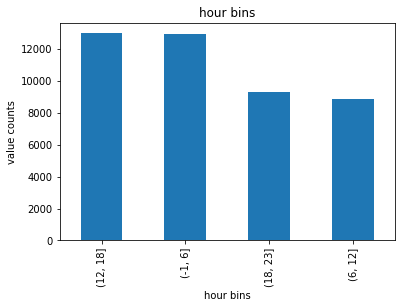

In [720]:
import matplotlib.pyplot as plt
%matplotlib inline

bins = [-1, 6, 12, 18, 23]
bin_hr = pd.cut(df['reported_hour'], bins)
bin_hr = bin_hr.cat.as_ordered()

bin_hr.value_counts().plot(kind='bar')
plt.title('hour bins')
plt.xlabel('hour bins')
plt.ylabel('value counts')

In [721]:
# now to afix this to our data frame and create dummies
df['time'] = bin_hr
df['time'] = df['time'].cat.codes
# Creating dummies
gbin_dummies = pd.get_dummies(bin_hr, prefix='hour') 

# keeping first column for now

df = df.drop(['time'], axis=1)
df = pd.concat([df, gbin_dummies], axis=1)
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,initial_call_type,final_call_type,officer_squad,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made,incident_year,incident_month,officer_age,reported_hour,call_made,dif_race,dif_gender,dif_race_gender,"hour_(-1, 6]","hour_(6, 12]","hour_(12, 18]","hour_(18, 23]"
0,Unknown,unassigned,20140000120677,92317,None,M,Black or African American,Asian,M,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,South,O,O2,N,Y,2015,10,31,11,0,Y,N,Y,0,1,0,0
1,Unknown,unassigned,20150000002351,45252,None,M,Hispanic,Other,F,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,21,0,Y,Y,Y,0,0,0,1
2,Unknown,unassigned,20150000002363,45182,None,M,Hispanic,White,M,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,22,0,Y,N,Y,0,0,0,1
3,Unknown,unassigned,20150000002392,45365,None,M,White,White,F,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,East,E,E2,N,N,2015,5,29,7,0,N,Y,Y,0,1,0,0
4,Unknown,unassigned,20150000002451,46430,None,M,Hispanic,Not Specified,Unable to Determine,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,1,0,Y,Y,Y,1,0,0,0


In [722]:
df = df.rename(columns={'hour_(-1, 6]':'12am_6am', 
                          'hour_(6, 12]':'7am_12pm', 
                           'hour_(12, 18]':'1pm_6pm', 
                          'hour_(18, 23]':'7pm_11pm'})

In [723]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,weapon,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,initial_call_type,final_call_type,officer_squad,frisk_flag,precinct,sector,beat,repeat_offenders,arrest_made,incident_year,incident_month,officer_age,reported_hour,call_made,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
0,Unknown,unassigned,20140000120677,92317,None,M,Black or African American,Asian,M,Unknown,Unknown,SOUTH PCT 1ST W - ROBERT,N,South,O,O2,N,Y,2015,10,31,11,0,Y,N,Y,0,1,0,0
1,Unknown,unassigned,20150000002351,45252,None,M,Hispanic,Other,F,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,21,0,Y,Y,Y,0,0,0,1
2,Unknown,unassigned,20150000002363,45182,None,M,Hispanic,White,M,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,22,0,Y,N,Y,0,0,0,1
3,Unknown,unassigned,20150000002392,45365,None,M,White,White,F,Unknown,Unknown,SOUTH PCT 1ST W - R/S RELIEF,N,East,E,E2,N,N,2015,5,29,7,0,N,Y,Y,0,1,0,0
4,Unknown,unassigned,20150000002451,46430,None,M,Hispanic,Not Specified,Unable to Determine,Unknown,Unknown,WEST PCT 3RD W - MARY,N,Unknown,Unknown,Unknown,N,N,2015,5,30,1,0,Y,Y,Y,1,0,0,0


In [724]:
# finally, drop reported hour
df = df.drop('reported_hour', axis=1)

### Precinct, Sector, and Beat

Arrests and frisks were performed, and most of them took place in June 2019 (the rest are random within 2019 and 2020) so 'FK ERROR' must be an error in which CAD system failed to capture the associated Precinct, Sector, and Beat the incident took place in (Beat 99 does not exist). These are not fake calls or fake stops, so we can make the changes.

In [725]:
prec = ['FK ERROR', 'OOJ'] # OOJ stands for Obstruction of Justice

sect = ['99    ']

beats = ['99', '99','99    ', 'OOJ']

In [726]:
# precinct
replace_val(df=df, column='precinct', old=prec, new='Unknown')
# sector
replace_val(df=df, column='sector', old=sect, new='Unknown')
# beat
replace_val(df=df, column='beat', old=beats, new='Unknown')

In [727]:
print(df.precinct.value_counts())
print(df.sector.value_counts())
print(df.beat.value_counts())

West         10462
North         9811
Unknown       9804
East          5710
South         5312
Southwest     2302
SouthWest      802
Name: precinct, dtype: int64
Unknown    9810
M          2255
E          2237
N          2173
K          1750
B          1648
L          1629
D          1500
R          1448
K          1444
F          1365
S          1340
U          1294
O          1156
J          1115
G          1039
M          1014
C           983
Q           957
D           944
W           936
E           792
Q           594
N           573
O           497
F           477
R           464
S           408
B           385
G           367
U           366
J           336
W           325
L           291
C           291
Name: sector, dtype: int64
Unknown    9804
N3         1166
E2         1048
M2          846
K3          798
           ... 
U3           72
J2           63
N1           63
C2           62
S             2
Name: beat, Length: 104, dtype: int64


In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44203 entries, 0 to 44257
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44203 non-null  object
 1   subject_id                44203 non-null  object
 2   go_sc_num                 44203 non-null  int64 
 3   terry_stop_id             44203 non-null  int64 
 4   weapon                    44203 non-null  object
 5   officer_gender            44203 non-null  object
 6   officer_race              44203 non-null  object
 7   subject_perceived_race    44203 non-null  object
 8   subject_perceived_gender  44203 non-null  object
 9   initial_call_type         44203 non-null  object
 10  final_call_type           44203 non-null  object
 11  officer_squad             44203 non-null  object
 12  frisk_flag                44203 non-null  object
 13  precinct                  44203 non-null  object
 14  sector                

In [729]:
df = df.drop(['subject_id', 'go_sc_num', 'terry_stop_id'], axis = 1)

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44203 entries, 0 to 44257
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         44203 non-null  object
 1   weapon                    44203 non-null  object
 2   officer_gender            44203 non-null  object
 3   officer_race              44203 non-null  object
 4   subject_perceived_race    44203 non-null  object
 5   subject_perceived_gender  44203 non-null  object
 6   initial_call_type         44203 non-null  object
 7   final_call_type           44203 non-null  object
 8   officer_squad             44203 non-null  object
 9   frisk_flag                44203 non-null  object
 10  precinct                  44203 non-null  object
 11  sector                    44203 non-null  object
 12  beat                      44203 non-null  object
 13  repeat_offenders          44203 non-null  object
 14  arrest_made           

In [731]:
col_values(df)

subject_age_group


26 - 35         14725
36 - 45          9323
18 - 25          8910
46 - 55          5694
56 and Above     2246
1 - 17           1906
Unknown          1399
Name: subject_age_group, dtype: int64
-------------------------------------------------------


weapon


None                                 32083
Unknown                               9578
Lethal Cutting Instrument             1454
Knife/Cutting/Stabbing Instrument      481
Handgun                                277
Firearm Other                           98
Blunt Object/Striking Implement         66
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       16
Other Firearm                           15
Firearm (unk type)                      15
Club                                     8
Rifle                                    7
None/Not Applicable                      7
Taser/Stun Gun                           5
Fire/Incendiary Device           

Done Cleaning and Engineering...Saving it to use in EDA

In [732]:
df_eda.to_csv('cleaned_terry_stop_for_eda.csv')